In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smtsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [29]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [30]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [31]:
print("Quantidade de linhas e colunas:", df.shape)

Quantidade de linhas e colunas: (159, 7)


In [32]:
print('Quantidade de dados nulos:', df.isna().sum().sum())

Quantidade de dados nulos: 0


In [33]:
df.columns = ["Especie", "Peso", "Comprimento1", "Comprimento2", "Comprimento3", "Altura", "Largura"]

df.head()

,Especie,Peso,Comprimento1,Comprimento2,Comprimento3,Altura,Largura
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


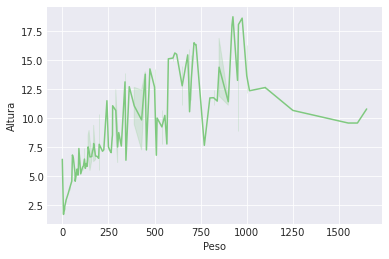

In [34]:
sns.lineplot(x="Peso", y="Altura", data=df)

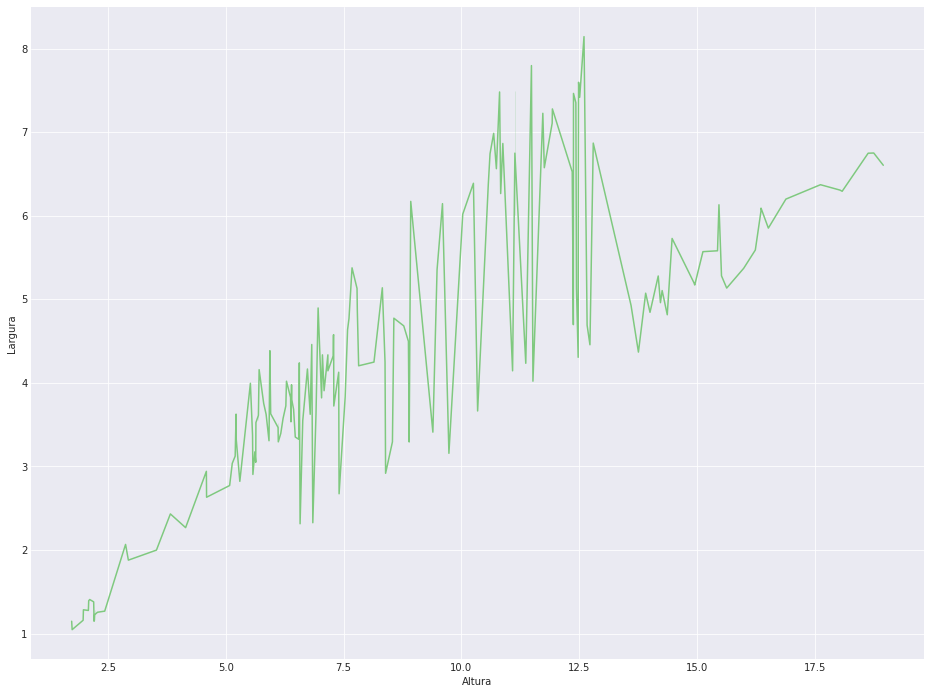

In [35]:
plt.figure(figsize=(16,12))

sns.lineplot(x="Altura", y="Largura", data=df)

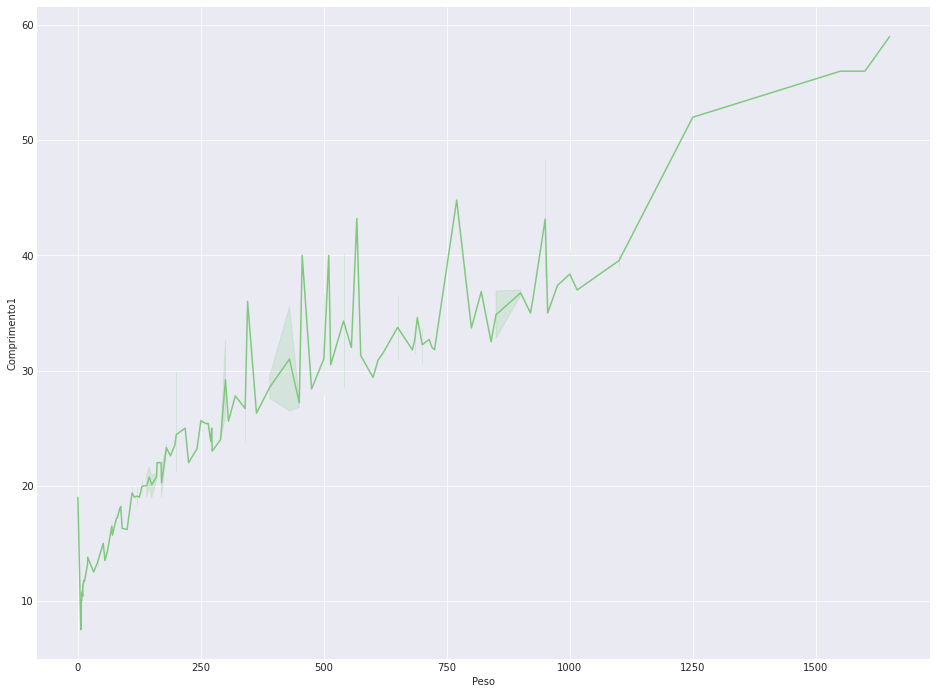

In [36]:
plt.figure(figsize=(16,12))

sns.lineplot(x="Peso", y="Comprimento1", data=df)

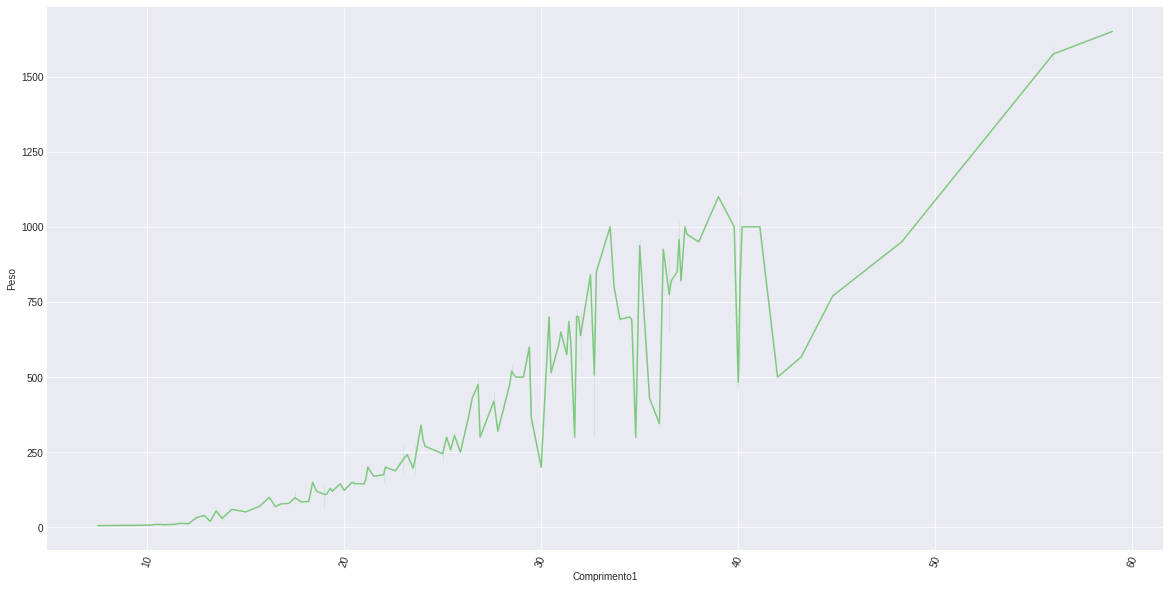

In [37]:
plt.figure(figsize=(20, 10))
plt.style.use('seaborn-darkgrid')

x1 = sns.lineplot(x="Comprimento1", y="Peso", data=df)
plt.xticks(rotation=70);
plt.show()

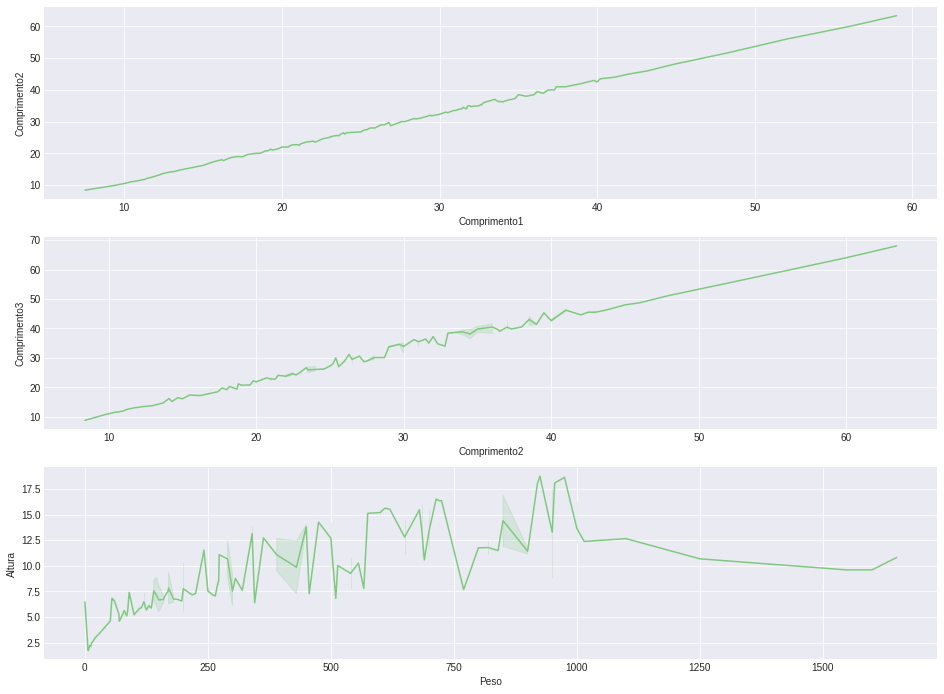

In [38]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)

sns.lineplot(x='Comprimento1', y='Comprimento2', data=df)
plt.subplot(3,1,2)

sns.lineplot(x='Comprimento2', y='Comprimento3', data=df)
plt.subplot(3,1,3)

sns.lineplot(x='Peso', y='Altura', data=df)
ax = ax

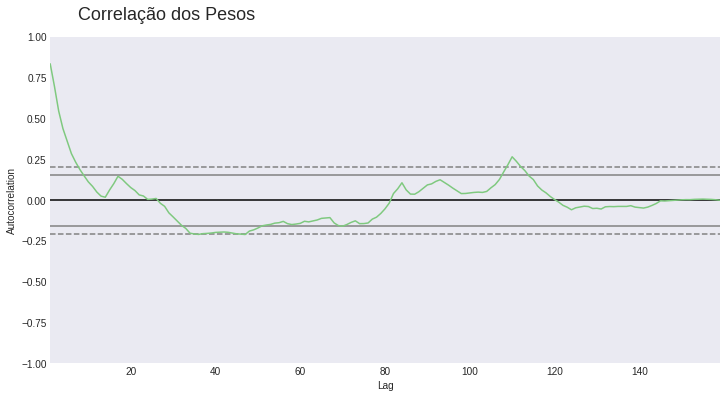

In [39]:
from pandas.plotting import autocorrelation_plot

ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos Pesos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df['Peso'])
ax = ax

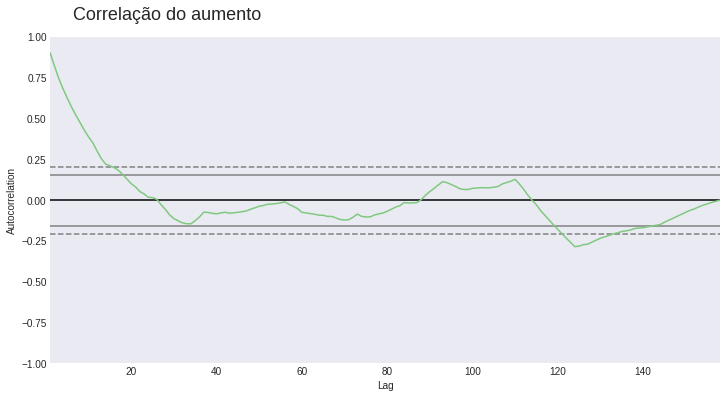

In [40]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df['Altura'][1:])
ax = ax

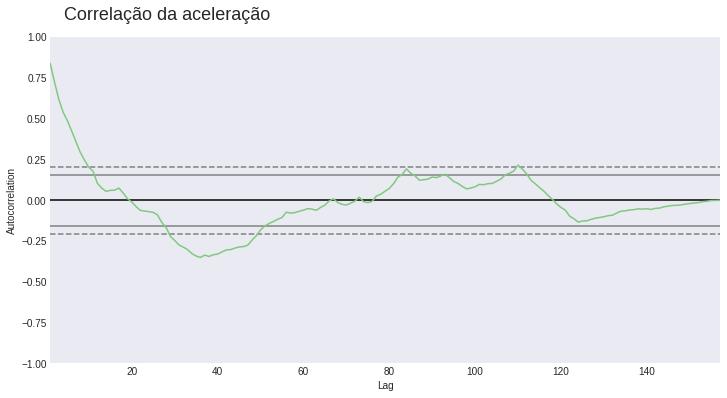

In [41]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df['Largura'][2:])
ax = ax

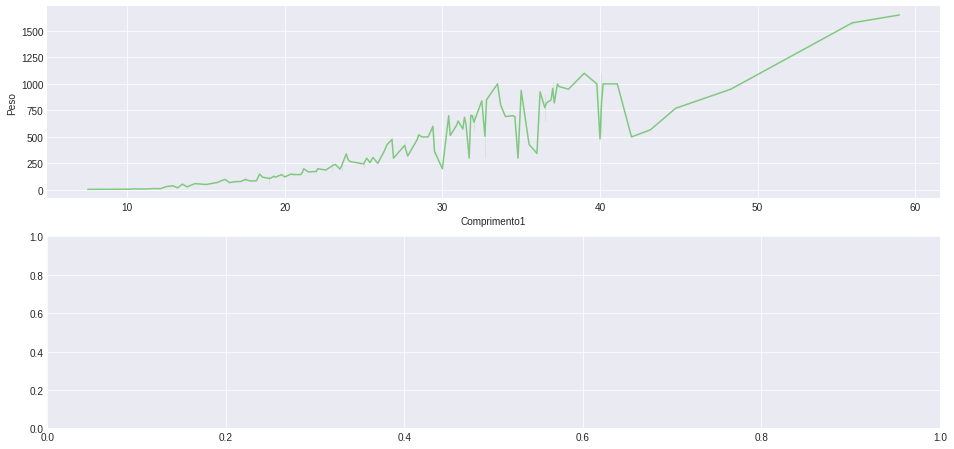

In [42]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)

sns.lineplot(x="Comprimento1", y="Peso", data=df)
plt.subplot(3,1,2)

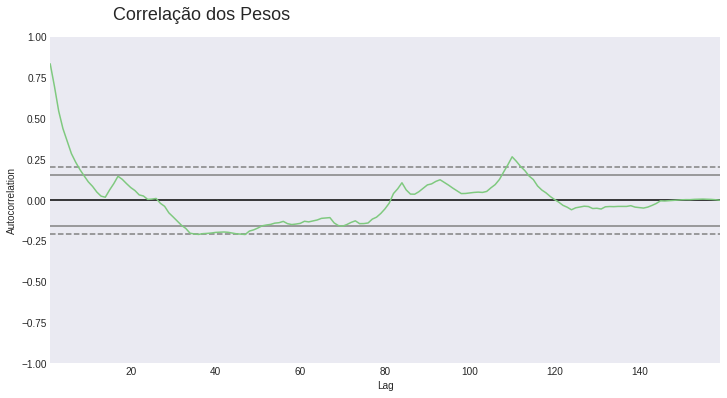

In [43]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação dos Pesos", fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(df['Peso'])
ax = ax

In [44]:
df["Peso"] = df["Altura"].diff()
df.head()

,Especie,Peso,Comprimento1,Comprimento2,Comprimento3,Altura,Largura
0,Bream,NaN,23.2,25.4,30.0,11.5200,4.0200
1,Bream,0.9600,24.0,26.3,31.2,12.4800,4.3056
2,Bream,-0.1022,23.9,26.5,31.1,12.3778,4.6961
3,Bream,0.3522,26.3,29.0,33.5,12.7300,4.4555
4,Bream,-0.2860,26.5,29.0,34.0,12.4440,5.1340


In [45]:
def plot(x, y1, y2, y3, dataset, titulo):
    
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

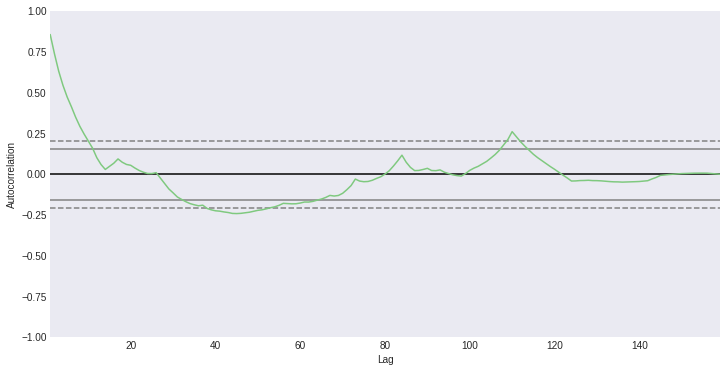

In [ ]:
ax = plt.figure(figsize=(12,6))

autocorrelation_plot(df['Comprimento1'])
ax

In [ ]:
ax = plt.figure(figsize=(12,6))

autocorrelation_plot(df['Comprimento2'])
ax 

In [ ]:
ax = plt.figure(figsize=(12,6))
autocorrelation_plot(df['Comprimento3'])
ax

**Modelo - Sarima, ARIMA**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df["Peso"]);

In [ ]:
plot_acf(df["Comprimento1"]);

In [ ]:
plot_pacf(df["Comprimento2"]);

In [ ]:
df_1 = df[:26][:]
df_2 = df[26:][:]

In [ ]:
from pmdarima.arima import auto_arima
modelo_arima = auto_arima(df_1["Peso"].values, start_p = 0, start_q = 0,
                         max_p = 8, max_q = 8, d = 2, seasonal = False, trace = True,
                         error_action = "ignore", suppress_warnings = True, stepwise = False)

In [ ]:
modelo_arima.aic()

In [ ]:
modelo_arima.fit(df_1["Peso"]. values)

model_predict = modelo_arima.predict(n_periods = 10)
model_predict

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(df["Peso"])
plt.plot(model_predict)

# **Modelo Sarima**

In [ ]:
from pmdarima.arima.utils import nsdiffs

df_s = nsdiffs(df['Peso'].values, m=2, max_D=12, test='ch')
df_s

In [ ]:
from pmdarima.arima import auto_arima

modelo_sarima = auto_arima(df['Peso'].values,start_p = 0, start_q = 0, max_p = 6, max_q = 6, d = 1,D = 1,
                            start_Q = 2, start_P = 2, max_P = 5, max_Q = 5, m = 3, seasonal = True, trace = True, 
                            error_action ='ignore',
                            suppress_warnings = True, stepwise = False, maxiter = 50)

modelo_sarima.aic()

In [ ]:
modelo_sarima.fit(df_1["Peso"]. values)

ml_predict = modelo_sarima.predict(n_periods = 10)
ml_predict

In [ ]:
plt.plot(ml_predict)

plt.plot(df["Comprimento1"], df["Comprimento2"])